In [ ]:
import tensorflow.compat.v1 as tf
from sklearn.metrics import confusion_matrix
import numpy as np
from scipy.io import loadmat
import os
from pywt import wavedec
from functools import reduce
from scipy import signal
from scipy.stats import entropy
from scipy.fft import fft, ifft
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from tensorflow import keras as K
import matplotlib.pyplot as plt
import scipy
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold,cross_validate
from tensorflow.keras.layers import Dense, Activation, Flatten, concatenate, Input, Dropout, LSTM, Bidirectional,BatchNormalization,PReLU,ReLU,Reshape
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential, Model, load_model
import matplotlib.pyplot as plt;
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.decomposition import PCA
from tensorflow import keras
from sklearn.model_selection import cross_val_score
from tensorflow.keras.layers import Conv1D,Conv2D,Add
from tensorflow.keras.layers import MaxPool1D, MaxPooling2D
import seaborn as sns

In [ ]:
#Importing data with some changes
def import_data(df_initial,path):
  df=pd.read_csv(path)
  df=df.replace(['?','NaN'])   #Replace missing or unknow values with NaN format (undefined)
  df=df.dropna()  #drop missing or NaN values from all rows
  df=df.drop(["timestamp"],axis=1)   #drop these columns
  df=pd.concat([df_initial,df],ignore_index=True)  #concatenate rows of two data frames to form a larger dataset with index of final dataframe starting from 0
  return df

In [ ]:
#Importing data with some changes
def import_data2(df_initial,path):
  df=pd.read_csv(path)
  df=df.replace(['?','NaN'])   #Replace missing or unknow values with NaN format (undefined)
  df=df.dropna()  #drop missing or NaN values from all rows
  df=df.drop(["timestamp","mid-gamma"],axis=1)   #drop these columns
  df=pd.concat([df_initial,df],ignore_index=True)  #concatenate rows of two data frames to form a larger dataset with index of final dataframe starting from 0
  return df

In [ ]:
df_database=[]   #create an empty array
df_database=pd.DataFrame(df_database)    #turn this array to a dataframe
df_database=import_data(df_database,'4by4awake.csv')
df_database=import_data(df_database,'closedeyesdrowsy.csv')
df_database=import_data(df_database,'mostboringvideo.csv')
df_database=import_data(df_database,'sortemawake.csv')
df_database=import_data(df_database,'sondossortemawake.csv')
df_database=import_data(df_database,'sondosclosedeyes.csv')
df_database=import_data(df_database,'mariamdrowsyjustwokeup.csv')
df_database=import_data(df_database,'mariammath.csv')
df_database=import_data(df_database,'awakestudying.csv')
df_database=import_data(df_database,'yasmindrowsywhitenoise.csv')
df_database=import_data(df_database,'midnightsleepy.csv')
df_database=import_data(df_database,'studyingawake.csv')
df_database=import_data(df_database,'hadeerawake.csv')
df_database=import_data(df_database,'hadeerdrowsy.csv')
df_database=import_data(df_database,'youssefawake.csv')
df_database=import_data(df_database,'youssefdrowsy.csv')
#df_database=import_data(df_database,'studyingawake2.csv')
#df_database=import_data(df_database,'anna_midnight_beforesleep_2022-03-06.csv')




df_database

,attention,meditation,delta,theta,low-alpha,high-alpha,low-beta,high-beta,low-gamma,high-gamma,state
0,1,57,727588,109134,67697,14179,41885,15207,7712,2570,1
1,1,75,199635,24626,99707,18500,12313,9006,7027,6066,1
2,20,70,103167,58415,14880,7782,10555,13172,5072,7225,1
3,26,75,976542,60326,17517,27428,45169,16621,6398,10696,1
4,20,60,437574,353117,31717,154062,60449,29855,3753,53760,1
...,...,...,...,...,...,...,...,...,...,...,...
10195,50,41,1553057,469417,141813,155710,58595,66031,48597,42334,0
10196,50,41,2119105,230321,71465,49353,75470,23184,53487,19914,0
10197,50,41,1091497,114583,21324,26509,57733,23198,20638,24579,0
10198,50,44,436946,331497,70624,159659,59817,55120,113086,39718,0


<Axes: >

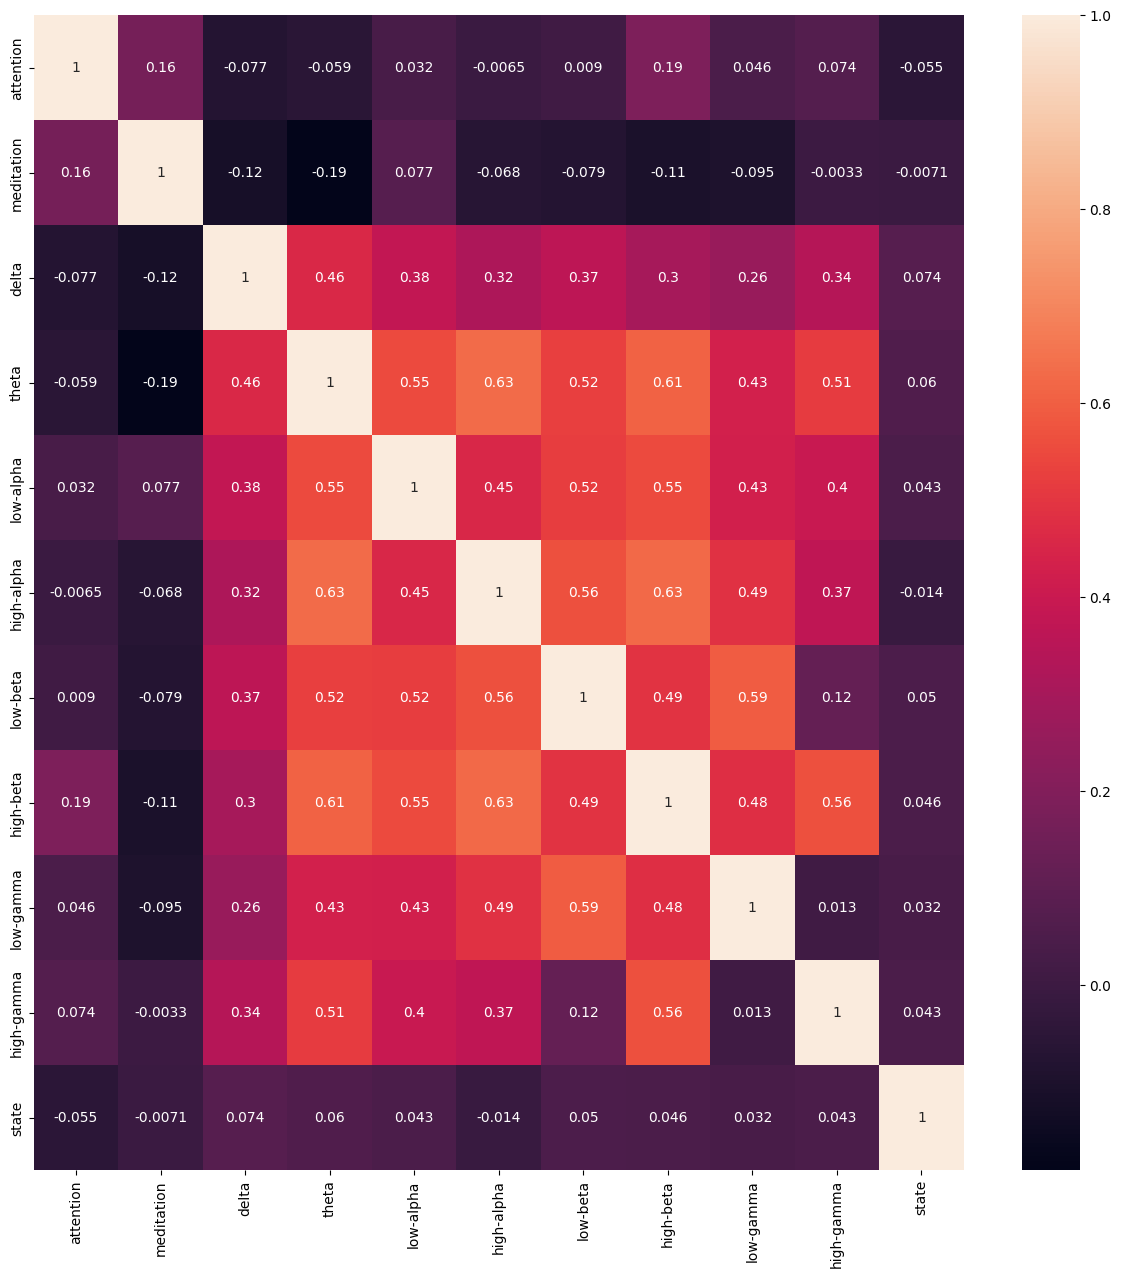

In [ ]:
plt.figure(figsize = (15,15))
cor_matrix = df_database.corr()
sns.heatmap(cor_matrix,annot=True)

In [ ]:
df_database.isnull().sum()

attention     0
meditation    0
delta         0
theta         0
low-alpha     0
high-alpha    0
low-beta      0
high-beta     0
low-gamma     0
high-gamma    0
state         0
dtype: int64

In [ ]:
df_database.describe()

,attention,meditation,delta,theta,low-alpha,high-alpha,low-beta,high-beta,low-gamma,high-gamma,state
count,10200.000000,10200.000000,1.020000e+04,1.020000e+04,10200.000000,1.020000e+04,10200.000000,10200.000000,10200.000000,1.020000e+04,10200.000000
mean,48.327353,53.160098,4.648611e+05,1.337574e+05,37290.866471,2.934717e+04,19790.711667,21642.057549,8868.047745,1.440595e+05,0.497255
std,20.780524,18.450735,5.827911e+05,2.208441e+05,63869.002475,5.240268e+04,38105.097242,42574.503537,24109.199797,2.946899e+05,0.500017
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,35.000000,41.000000,5.407075e+04,2.642650e+04,7599.750000,6.734250e+03,5080.500000,4524.750000,1702.750000,4.659750e+03,0.000000
50%,48.000000,53.000000,2.001775e+05,5.832300e+04,17188.000000,1.456850e+04,10068.500000,9126.500000,3567.000000,1.599050e+04,0.000000
75%,63.000000,66.000000,6.901185e+05,1.411562e+05,38939.500000,3.082050e+04,20080.000000,18419.750000,7319.250000,1.348252e+05,1.000000
max,128.000000,100.000000,4.006016e+06,2.670701e+06,882561.000000,1.135442e+06,945239.000000,637860.000000,774040.000000,2.494473e+06,1.000000


In [ ]:
dataset = df_database.copy()
dataset = dataset[dataset['attention'] > 0.0]
dataset = dataset[dataset['meditation'] > 0.0]

In [ ]:
print("After cleaning, the data has {} rows and {} columns.".format(dataset.shape[0],dataset.shape[1]))

After cleaning, the data has 10061 rows and 11 columns.


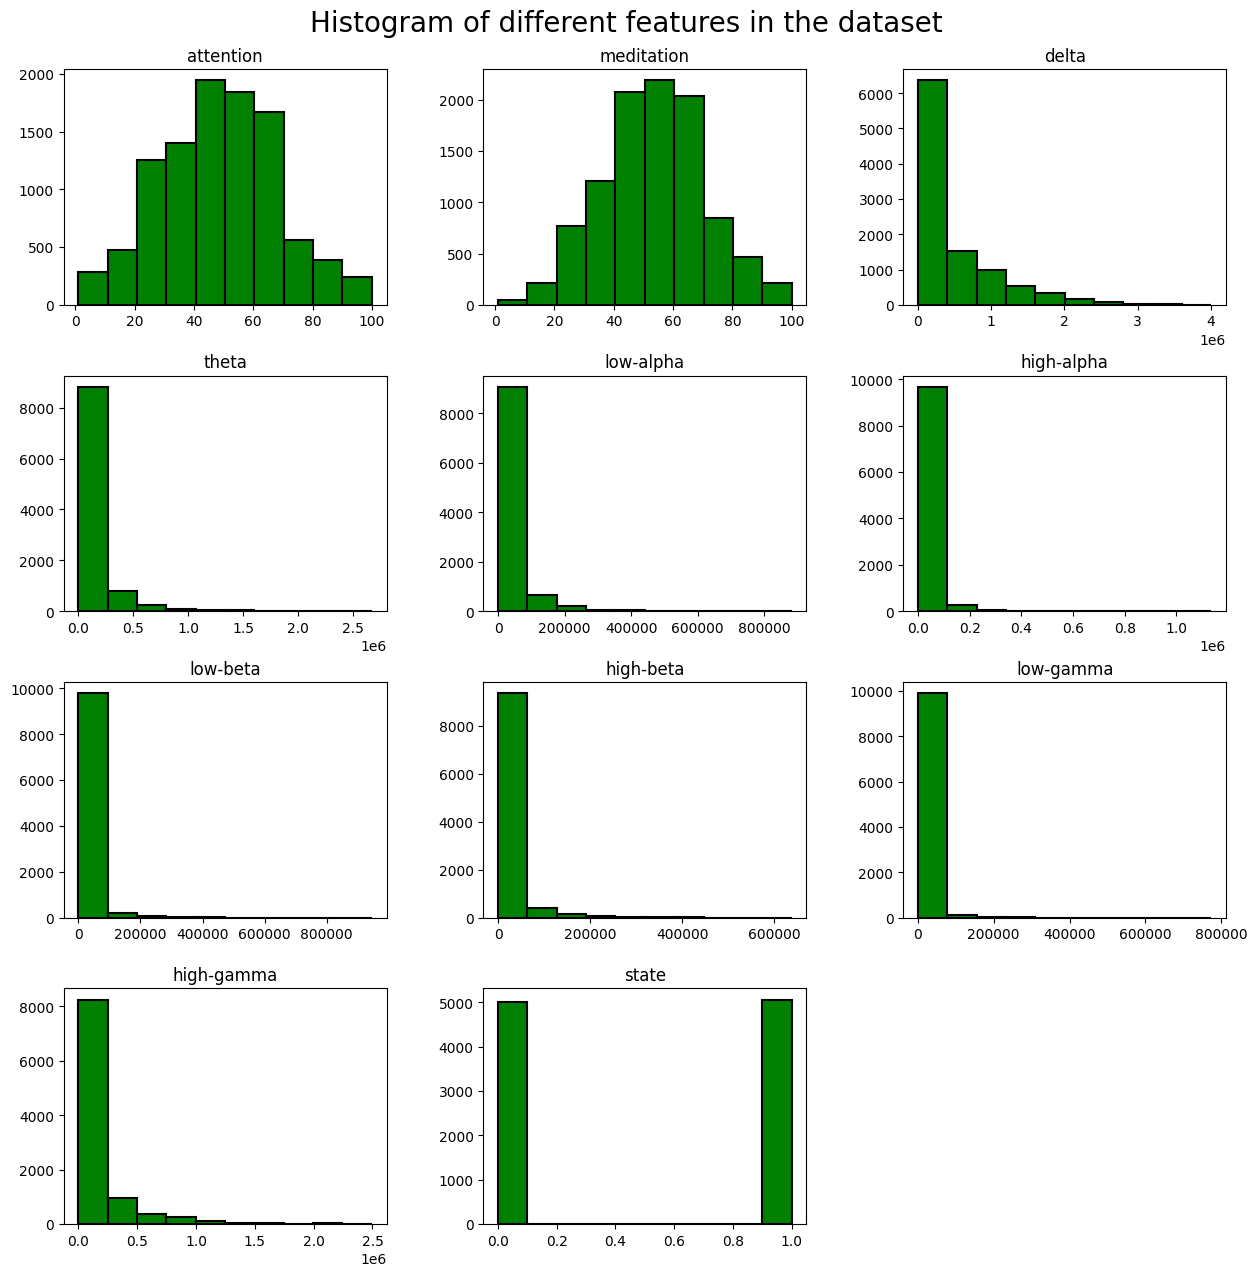

In [ ]:
dataset.hist(figsize = (15,15), grid = False, color = "green", edgecolor = 'black',linewidth = 1.5 )
plt.suptitle('Histogram of different features in the dataset',fontsize = 20,y= 0.92)
plt.show()

array([[<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'low-alpha'}>,
        <Axes: title={'center': 'high-alpha'}>],
       [<Axes: title={'center': 'low-beta'}>,
        <Axes: title={'center': 'high-beta'}>,
        <Axes: title={'center': 'low-gamma'}>],
       [<Axes: title={'center': 'high-gamma'}>, <Axes: >, <Axes: >]],
      dtype=object)

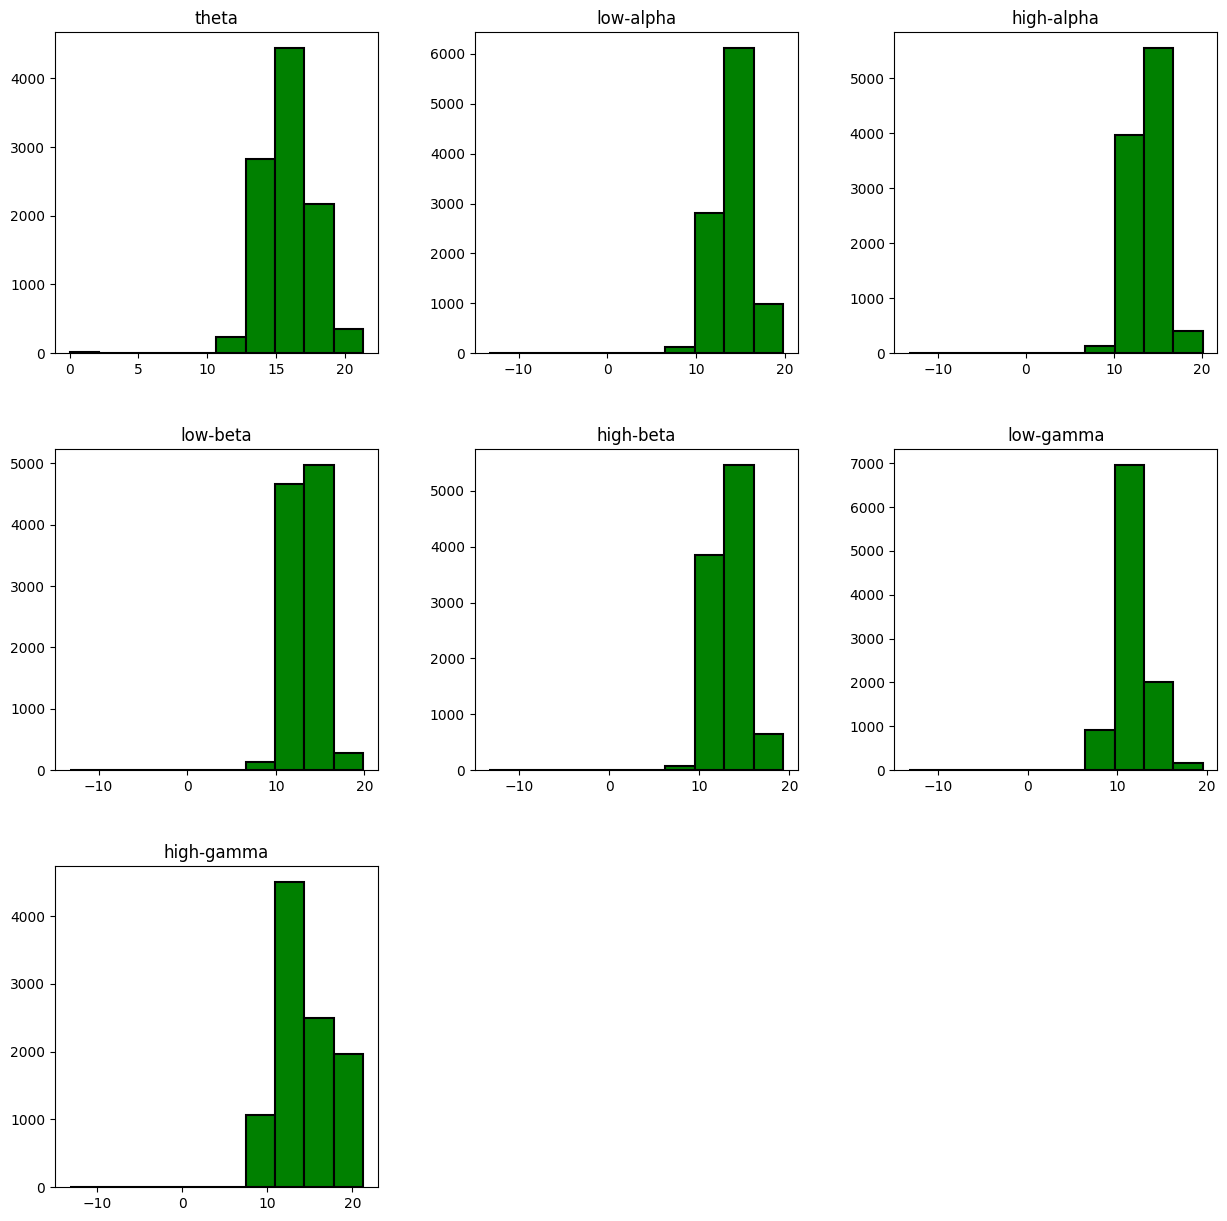

In [ ]:
#Applying non-linear normalization for spreading the data
X_n = dataset.iloc[:,:-1].copy() #data that will be normalized
X_n.iloc[:,3:11] = np.log2(X_n.iloc[:,3:11] + 0.0001) #spreading the amount data using log normalization technique
X_n.iloc[:,3:11].hist(figsize = (15,15), grid = False, color = "green", edgecolor = 'black',linewidth = 1.5 )

In [ ]:
m = np.mean(X_n, axis=0) # array([16.25, 26.25])
std = np.std(X_n, axis=0) # array([17.45530005, 22.18529919])
md = np.median(X_n,axis = 0)
p75 = np.percentile(X_n,75,axis = 0)
p25 = np.percentile(X_n,25,axis = 0)

In [ ]:
X_n = np.tanh((X_n - md) / (p75 - p25)) #normalization and feature scaling for train set

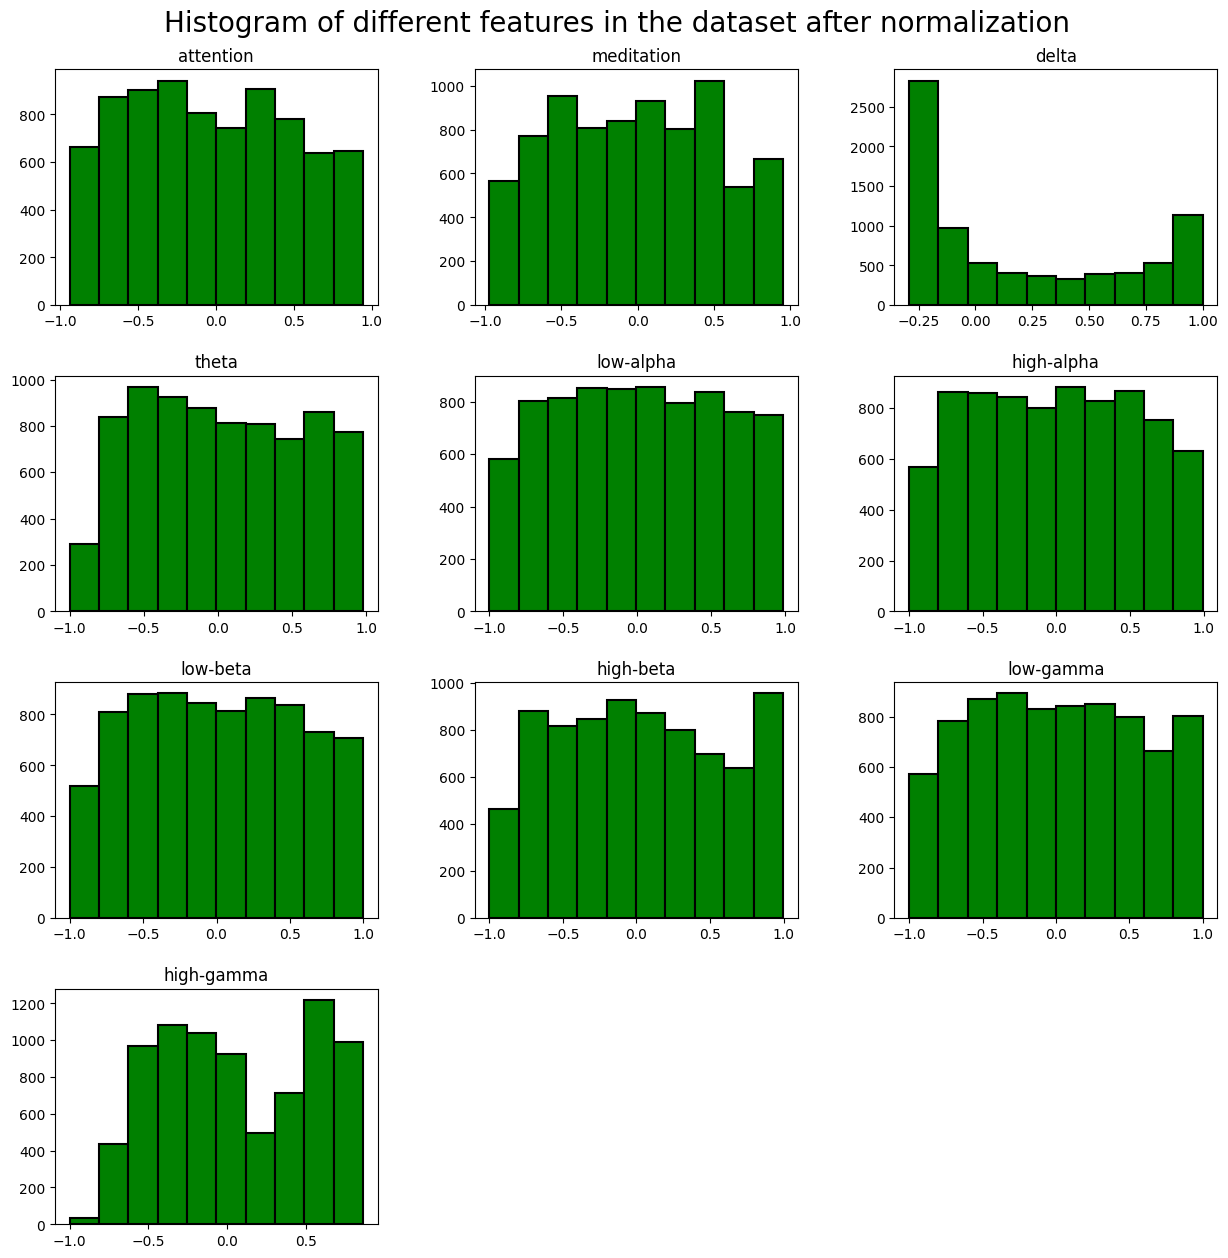

In [ ]:
X_n.hist(figsize = (15,15), grid = False, color = "green", edgecolor = 'black',linewidth = 1.5 )
plt.suptitle('Histogram of different features in the dataset after normalization',fontsize = 20,y= 0.92)
plt.show()

In [ ]:
X = X_n #features
Y = dataset.iloc[:,-1] #targets
X.shape

(7897, 10)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.15)

In [ ]:
import math
import numpy as np

# Assuming you have x_train as a DataFrame with shape (num_samples, num_features)

num_samples_x_train = x_train.shape[0]

# Calculate the number of samples divisible by 10
num_samples_divisible_by_10_x_train = math.floor(num_samples_x_train / 10) * 10

# Calculate the number of excess samples to remove
num_samples_to_remove_x_train = num_samples_x_train - num_samples_divisible_by_10_x_train

# Remove the excess samples
if num_samples_to_remove_x_train != 0:
  x_train = x_train[:-num_samples_to_remove_x_train]
x_train.shape
# Convert DataFrame to NumPy array and reshape it into timesteps of 10




(6710, 10)

In [ ]:
if x_test.shape[0]-y_test.shape[0] != 0:
  y_test=y_test[:x_test.shape[0]-y_test.shape[0]]
y_test.shape

(1185,)

In [ ]:
num_samples_x_test = x_test.shape[0]

# Calculate the number of samples divisible by 10
num_samples_divisible_by_10_x_test = math.floor(num_samples_x_test / 10) * 10

# Calculate the number of excess samples to remove
num_samples_to_remove_x_test = num_samples_x_test - num_samples_divisible_by_10_x_test

# Remove the excess samples
if num_samples_to_remove_x_test != 0:
  x_test = x_test[:-num_samples_to_remove_x_test]
x_test.shape
# Convert DataFrame to NumPy array and reshape it into timesteps of 10


(1180, 10)

In [ ]:
if x_train.shape[0]-y_train.shape[0] != 0:
  y_train=y_train[:x_train.shape[0]-y_train.shape[0]]
y_train.shape

(6710,)

In [ ]:
x_train.shape, x_test.shape,y_train.shape,y_test.shape

((6710, 10), (1180, 10), (6710,), (1185,))

In [ ]:
x_train = np.array(x_train).reshape(-1,2,10)
x_train.shape


(3355, 2, 10)

In [ ]:
x_test = np.array(x_test).reshape(-1,2,10)
x_test.shape

(590, 2, 10)

In [ ]:
y_train = np.mean(np.array(y_train).reshape(-1, 2), axis=1).astype(int)
y_train.shape

(3355,)

In [ ]:
if num_samples_to_remove_x_test != 0:
  y_test = y_test[:-num_samples_to_remove_x_test]

y_test = np.mean(np.array(y_test).reshape(-1, 2), axis=1).astype(int)
y_test.shape

(590,)

In [ ]:
x_train.shape, x_test.shape,y_train.shape,y_test.shape

((3355, 2, 10), (590, 2, 10), (3355,), (590,))

In [ ]:
inputs = tf.keras.Input(shape=(2,10))

Dense1 = Dense(64, activation = 'relu',kernel_regularizer=keras.regularizers.l2())(inputs)

#Dense2 = Dense(128, activation = 'relu',kernel_regularizer=keras.regularizers.l2())(Dense1)
#Dense3 = Dense(256, activation = 'relu',kernel_regularizer=keras.regularizers.l2())(Dense2)

lstm_1=  Bidirectional(LSTM(256, return_sequences = True))(Dense1)
drop = Dropout(0.3)(lstm_1)
lstm_2=  Bidirectional(LSTM(128, return_sequences = True))(drop)
drop2 = Dropout(0.3)(lstm_2)
lstm_3=  Bidirectional(LSTM(64, return_sequences = True))(drop)
drop2 = Dropout(0.3)(lstm_3)

flat = Flatten()(drop2)

#Dense_1 = Dense(256, activation = 'relu')(flat)

Dense_2 = Dense(128, activation = 'relu')(flat)
outputs = Dense(1, activation='sigmoid')(Dense_2)

model = tf.keras.Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 10)]           0         
                                                                 
 dense (Dense)               (None, 2, 64)             704       
                                                                 
 bidirectional (Bidirectiona  (None, 2, 512)           657408    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 2, 512)            0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 2, 128)           295424    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 2, 128)            0     

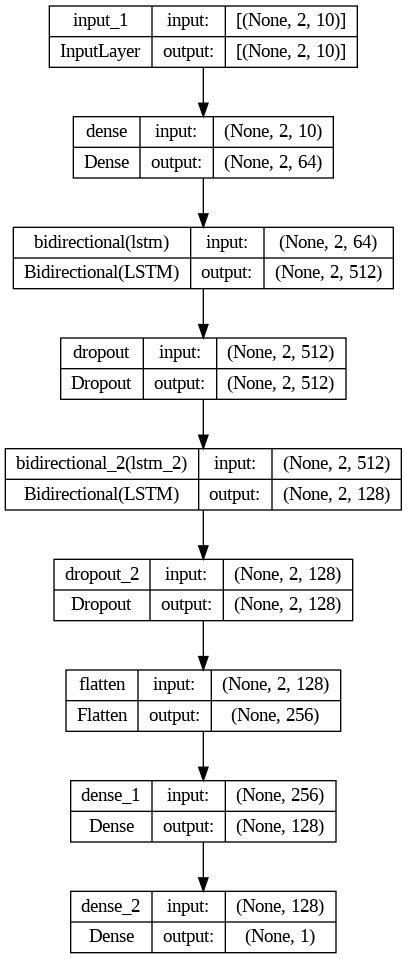

In [ ]:

from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


In [ ]:
def train_model(model,x_train, y_train,x_test,y_test, save_to, epoch = 2):

        opt_adam = keras.optimizers.Adam(learning_rate=0.001)

        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
        mc = ModelCheckpoint(save_to + '_best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
        lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))

        model.compile(optimizer=opt_adam,
                  loss=['binary_crossentropy'],
                  metrics=['accuracy'])

        history = model.fit(x_train,y_train,
                        batch_size=20,
                        epochs=epoch,
                        validation_data=(x_test,y_test),
                        callbacks=[es,mc,lr_schedule])


        saved_model = load_model(save_to + '_best_model.h5')

        return model,history

In [ ]:
model,history = train_model(model, x_train, y_train,x_test, y_test, save_to= './', epoch = 100)


Epoch 1/100
214/214 [==============================] - ETA: 0s - loss: 0.6547 - accuracy: 0.7432
Epoch 1: val_accuracy improved from -inf to 0.73775, saving model to ./_best_model.h5
214/214 [==============================] - 14s 37ms/step - loss: 0.6547 - accuracy: 0.7432 - val_loss: 0.5983 - val_accuracy: 0.7377 - lr: 0.0010
Epoch 2/100
212/214 [============================>.] - ETA: 0s - loss: 0.5714 - accuracy: 0.7465
Epoch 2: val_accuracy did not improve from 0.73775
214/214 [==============================] - 5s 22ms/step - loss: 0.5716 - accuracy: 0.7462 - val_loss: 0.5714 - val_accuracy: 0.7377 - lr: 9.0484e-04
Epoch 3/100
212/214 [============================>.] - ETA: 0s - loss: 0.5552 - accuracy: 0.7472
Epoch 3: val_accuracy did not improve from 0.73775
214/214 [==============================] - 6s 26ms/step - loss: 0.5564 - accuracy: 0.7462 - val_loss: 0.5648 - val_accuracy: 0.7364 - lr: 8.1873e-04
Epoch 4/100
213/214 [============================>.] - ETA: 0s - loss: 0.5469

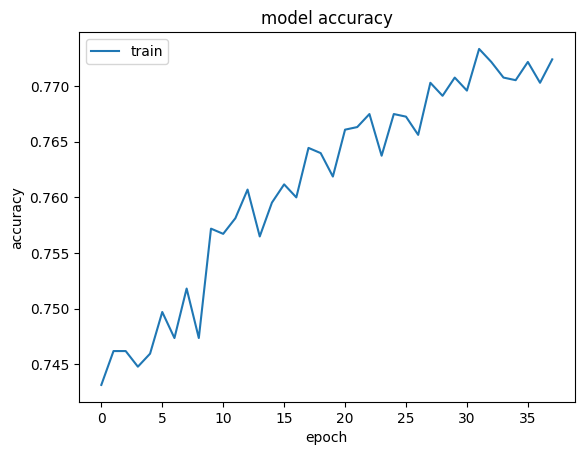

In [ ]:
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.legend(['train'], loc='upper left')
plt.show()


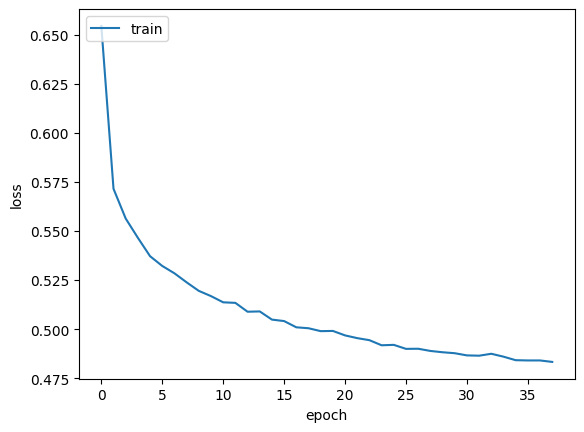

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
max_accuracy = max(history.history['accuracy'])
max_accuracy = round(max_accuracy*100, 3)
max_val_accuracy = max(history.history['val_accuracy'])
max_val_accuracy = round(max_val_accuracy*100, 3)
print("Maximum accuracy:", max_accuracy,"%")
print("Maximum validation accuracy:", max_val_accuracy,"%")



Maximum accuracy: 77.333 %
Maximum validation accuracy: 74.967 %
